# Data Analysis

## Importing The Dataset

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
original_data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\DataVision\Data_with_categorical_encoding_no.csv");
cat_data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\DataVision\Cleaned_Data\data_without_categorical_encoding.csv")
data = original_data.copy()
MAP_DATA = data.copy()

In [5]:
data.head()

,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,yellow_time,red_time,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,is_weekend,hour_of_day
0,9926.0,2023-01-07 21:20:00,6.0,Allahabad Junction,25.4358,81.8307,75.0,39.72,120.0,63.000000,4.0,53.0,0,2,0.0,4,1.21,48.0,4.0,6.0,17.0,0,21
1,8595.0,2023-01-06 23:10:00,5.0,Naini Bridge,25.4088,25.4088,139.0,30.33,120.0,51.000000,4.0,65.0,0,0,0.0,4,2.86,89.0,13.0,17.0,20.0,0,23
2,673.0,2023-01-01 11:10:00,3.0,Chowk,25.4314,81.8437,20.0,53.28,120.0,69.000000,5.0,46.0,0,3,1.0,4,0.34,15.0,1.0,2.0,2.0,0,11
3,8744.0,2023-01-07 01:40:00,4.0,Tagore Town,25.4675,81.8867,21.0,36.06,120.0,59.000000,4.0,57.0,4,2,0.0,4,0.54,12.0,4.0,2.0,3.0,0,1
4,316.0,2023-01-01 05:10:00,6.0,Allahabad Junction,25.4358,81.8307,41.0,47.21,120.0,63.852391,5.0,54.0,0,3,1.0,4,0.86,26.0,6.0,2.0,7.0,0,5


## Weather Impact Analysis

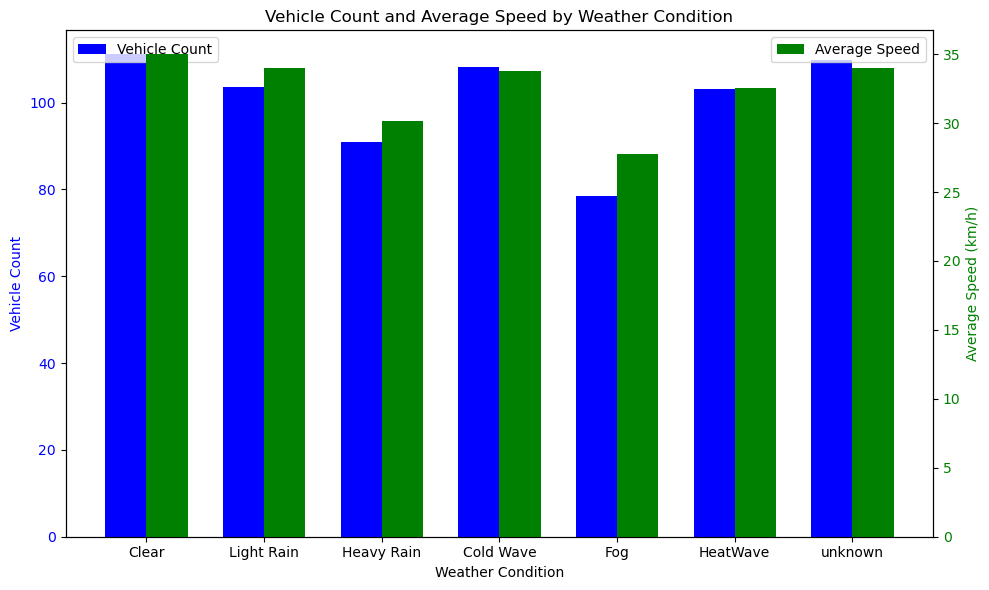

In [6]:
weather_mapping = {
    "Clear": 0,
    "Light Rain": 5,
    "Heavy Rain": 4,
    "Cold Wave": 1,
    "Fog": 2,
    "HeatWave": 3,
    "unknown": 6
}
avg_data = data.groupby('weather_condition')[['vehicle_count', 'average_speed']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(avg_data))

ax1.bar(index, avg_data['vehicle_count'], bar_width, color='b', label='Vehicle Count')
ax1.set_xlabel('Weather Condition')
ax1.set_ylabel('Vehicle Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in index], avg_data['average_speed'], bar_width, color='g', label='Average Speed')
ax2.set_ylabel('Average Speed (km/h)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Vehicle Count and Average Speed by Weather Condition')
ax1.set_xticks([i + bar_width / 2 for i in index])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticklabels(weather_mapping.keys()) 

plt.tight_layout()
plt.show()

Above Graph Shows how the weather condition effect the average speed and vehicle count

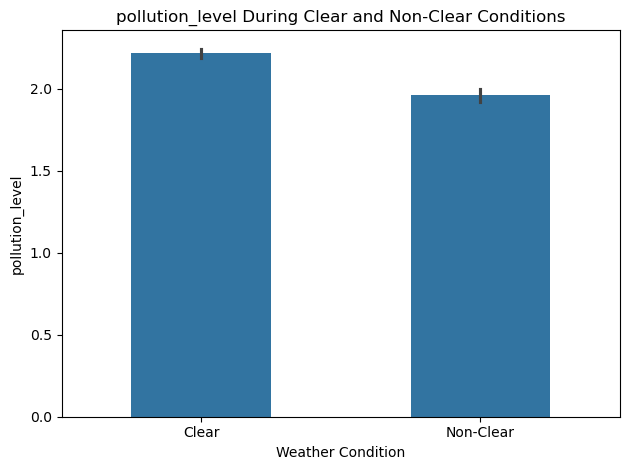

In [7]:
MAP_DATA['condition'] = data['weather_condition'].apply(lambda x: "Clear" if x == 0 else 'Non-Clear')
sns.barplot(x='condition', y='pollution_level',width = 0.5, data=MAP_DATA);
plt.title('pollution_level During Clear and Non-Clear Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('pollution_level')

plt.tight_layout();
plt.show();

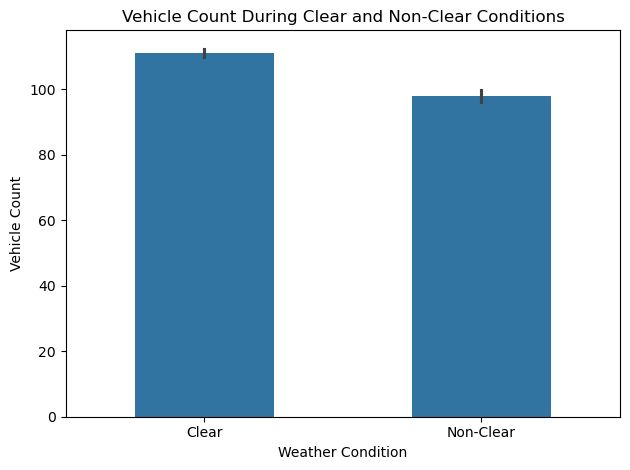

In [8]:
MAP_DATA['condition'] = data['weather_condition'].apply(lambda x: "Clear" if x == 0 else 'Non-Clear')
sns.barplot(x='condition', y='vehicle_count',width = 0.5, data=MAP_DATA);
plt.title('Vehicle Count During Clear and Non-Clear Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Vehicle Count')

plt.tight_layout();
plt.show();

Above graph shows how the vehicle count changes when it is clear weather an when it is not

## Holiday and Event Impact

In [9]:
data["is_holiday_or_special_event"] = (data['is_holiday'] == 1) | (data['event'] != 4)

In [10]:
data["is_holiday_or_special_event"].replace({
    True: "Special Day/Holiday" ,
    False:"Regular Day"
},inplace = True)

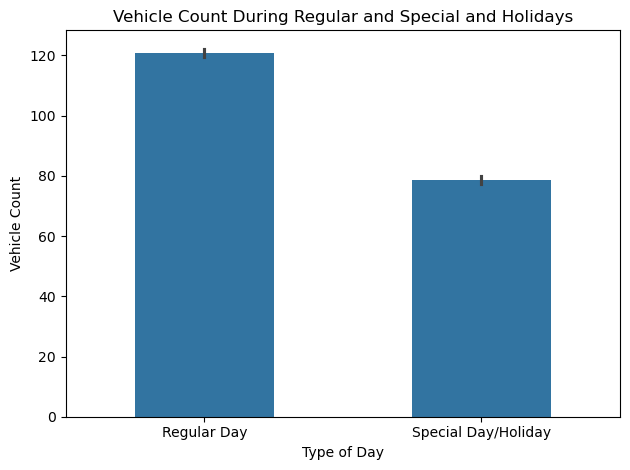

In [11]:
sns.barplot(x='is_holiday_or_special_event', y='vehicle_count',width = 0.5, data=data);
plt.title('Vehicle Count During Regular and Special and Holidays')
plt.xlabel('Type of Day')
plt.ylabel('Vehicle Count')

plt.tight_layout();
plt.show();

Above graph shows how the vehicle count pattern during regular and special days

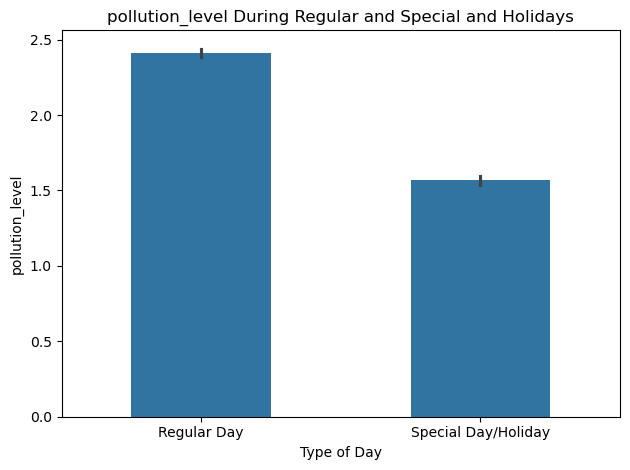

In [12]:
sns.barplot(x='is_holiday_or_special_event', y='pollution_level',width = 0.5, data=data);
plt.title('pollution_level During Regular and Special and Holidays')
plt.xlabel('Type of Day')
plt.ylabel('pollution_level')

plt.tight_layout();
plt.show();

# Weekend Impact

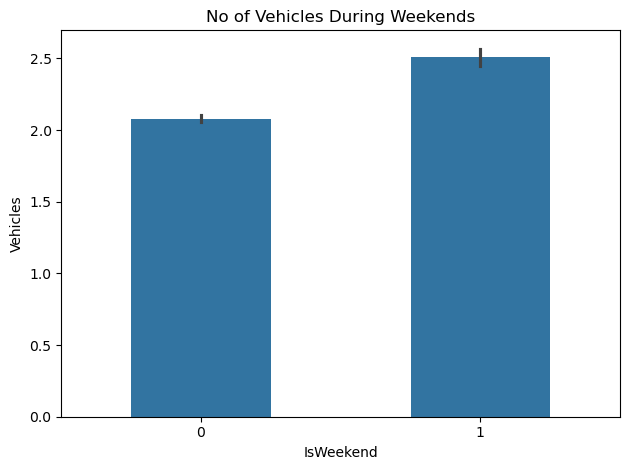

In [13]:
sns.barplot(x='is_weekend', y='pollution_level',width = 0.5, data=data);
plt.title('No of Vehicles During Weekends')
plt.xlabel('IsWeekend')
plt.ylabel('Vehicles')

plt.tight_layout();
plt.show();

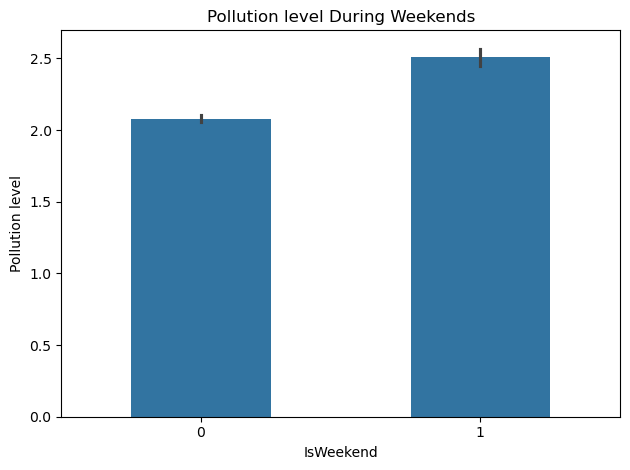

In [14]:
sns.barplot(x='is_weekend', y='pollution_level',width = 0.5, data=data);
plt.title('Pollution level During Weekends')
plt.xlabel('IsWeekend')
plt.ylabel('Pollution level')

plt.tight_layout();
plt.show();

## Correlation Analysis

In [15]:
Corr_coef_traffic_VS_avgspeed = data['vehicle_count'].corr(data['average_speed'])
Corr_coef_traffic_VS_pollution = data['vehicle_count'].corr(data['pollution_level']) 
print("Correlation Coefficient between Traffic and Average Speed",Corr_coef_traffic_VS_avgspeed)
print("Correlation Coefficient between Traffic and Pollution",Corr_coef_traffic_VS_pollution)

Correlation Coefficient between Traffic and Average Speed -0.7746503487895963
Correlation Coefficient between Traffic and Pollution 0.9684000275499323


In [16]:
corr_data = data.drop(['signal_cycle_time','record_id','timestamp' ,'intersection_name' , 'intersection_id' ,"is_holiday_or_special_event","day_of_week"] , axis = 1)

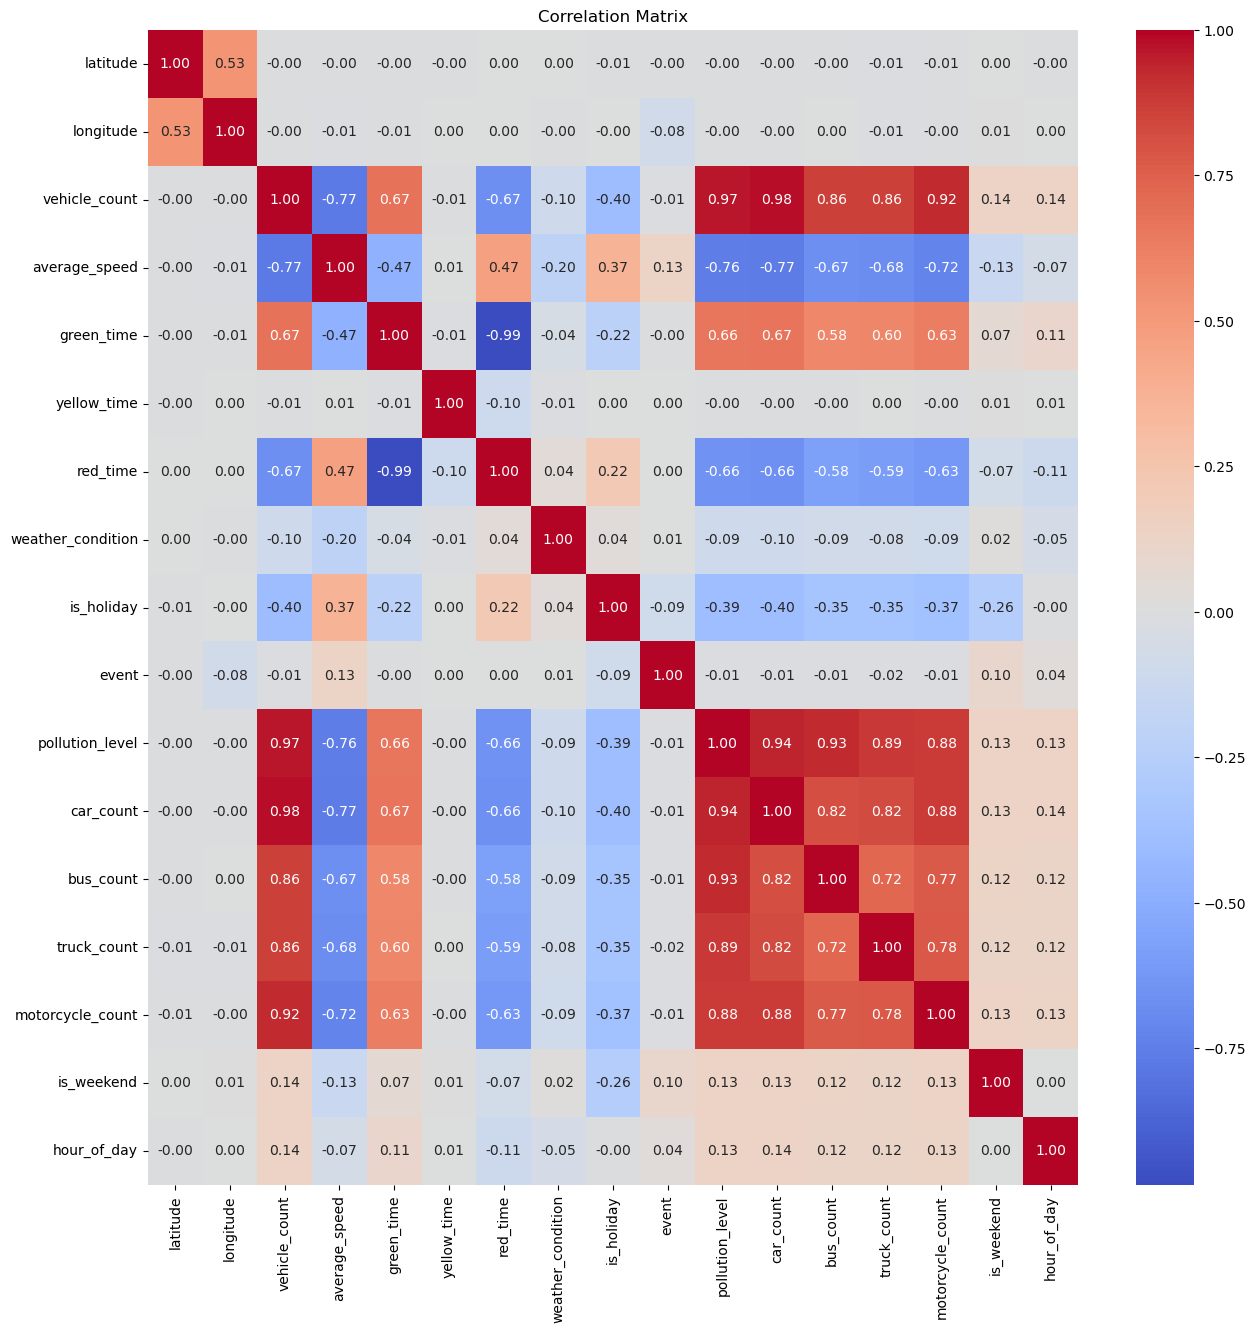

In [17]:
correlation_matrix = corr_data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Average Speed and Vehicle count distribution curve

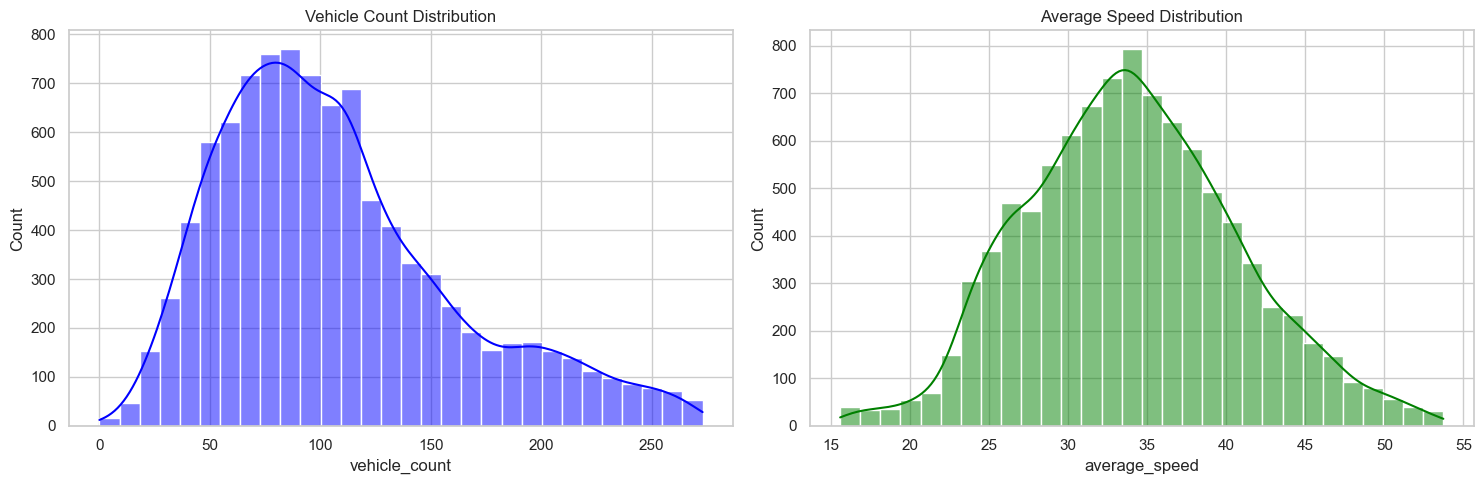

In [18]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Vehicle Count Distribution

sns.histplot(data['vehicle_count'], bins=30, ax=axs[0], kde=True, color='blue')
axs[0].set_title('Vehicle Count Distribution')

# Average Speed Distribution 
sns.histplot(data['average_speed'], bins=30, ax=axs[1], kde=True, color='green')
axs[1].set_title('Average Speed Distribution')

plt.tight_layout()

# Show the plots


# Different Vehicle Effect on Pollution

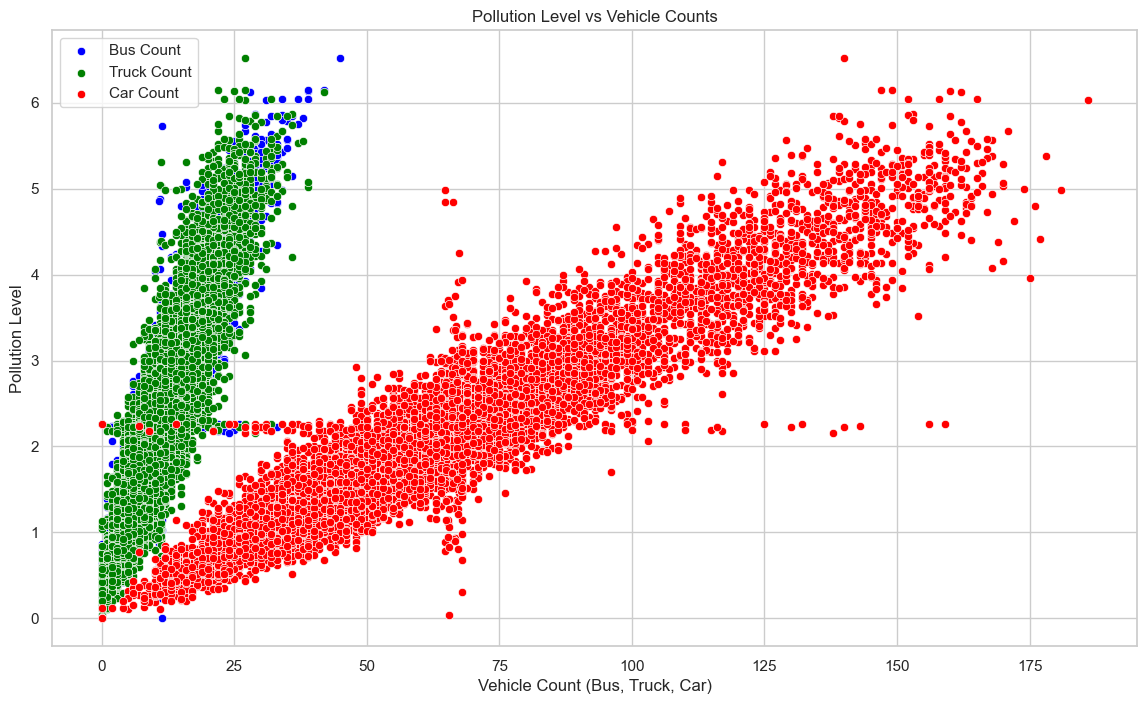

In [19]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='bus_count', y='pollution_level', data=data, label='Bus Count', color='blue')
sns.scatterplot(x='truck_count', y='pollution_level', data=data, label='Truck Count', color='green')
sns.scatterplot(x='car_count', y='pollution_level', data=data, label='Car Count', color='red')

plt.title('Pollution Level vs Vehicle Counts')
plt.xlabel('Vehicle Count (Bus, Truck, Car)')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Traffic Congestion HeatMap

In [33]:
heatmap_data = data.pivot_table(index='intersection_name', columns='hour_of_day', values='vehicle_count', aggfunc='sum')

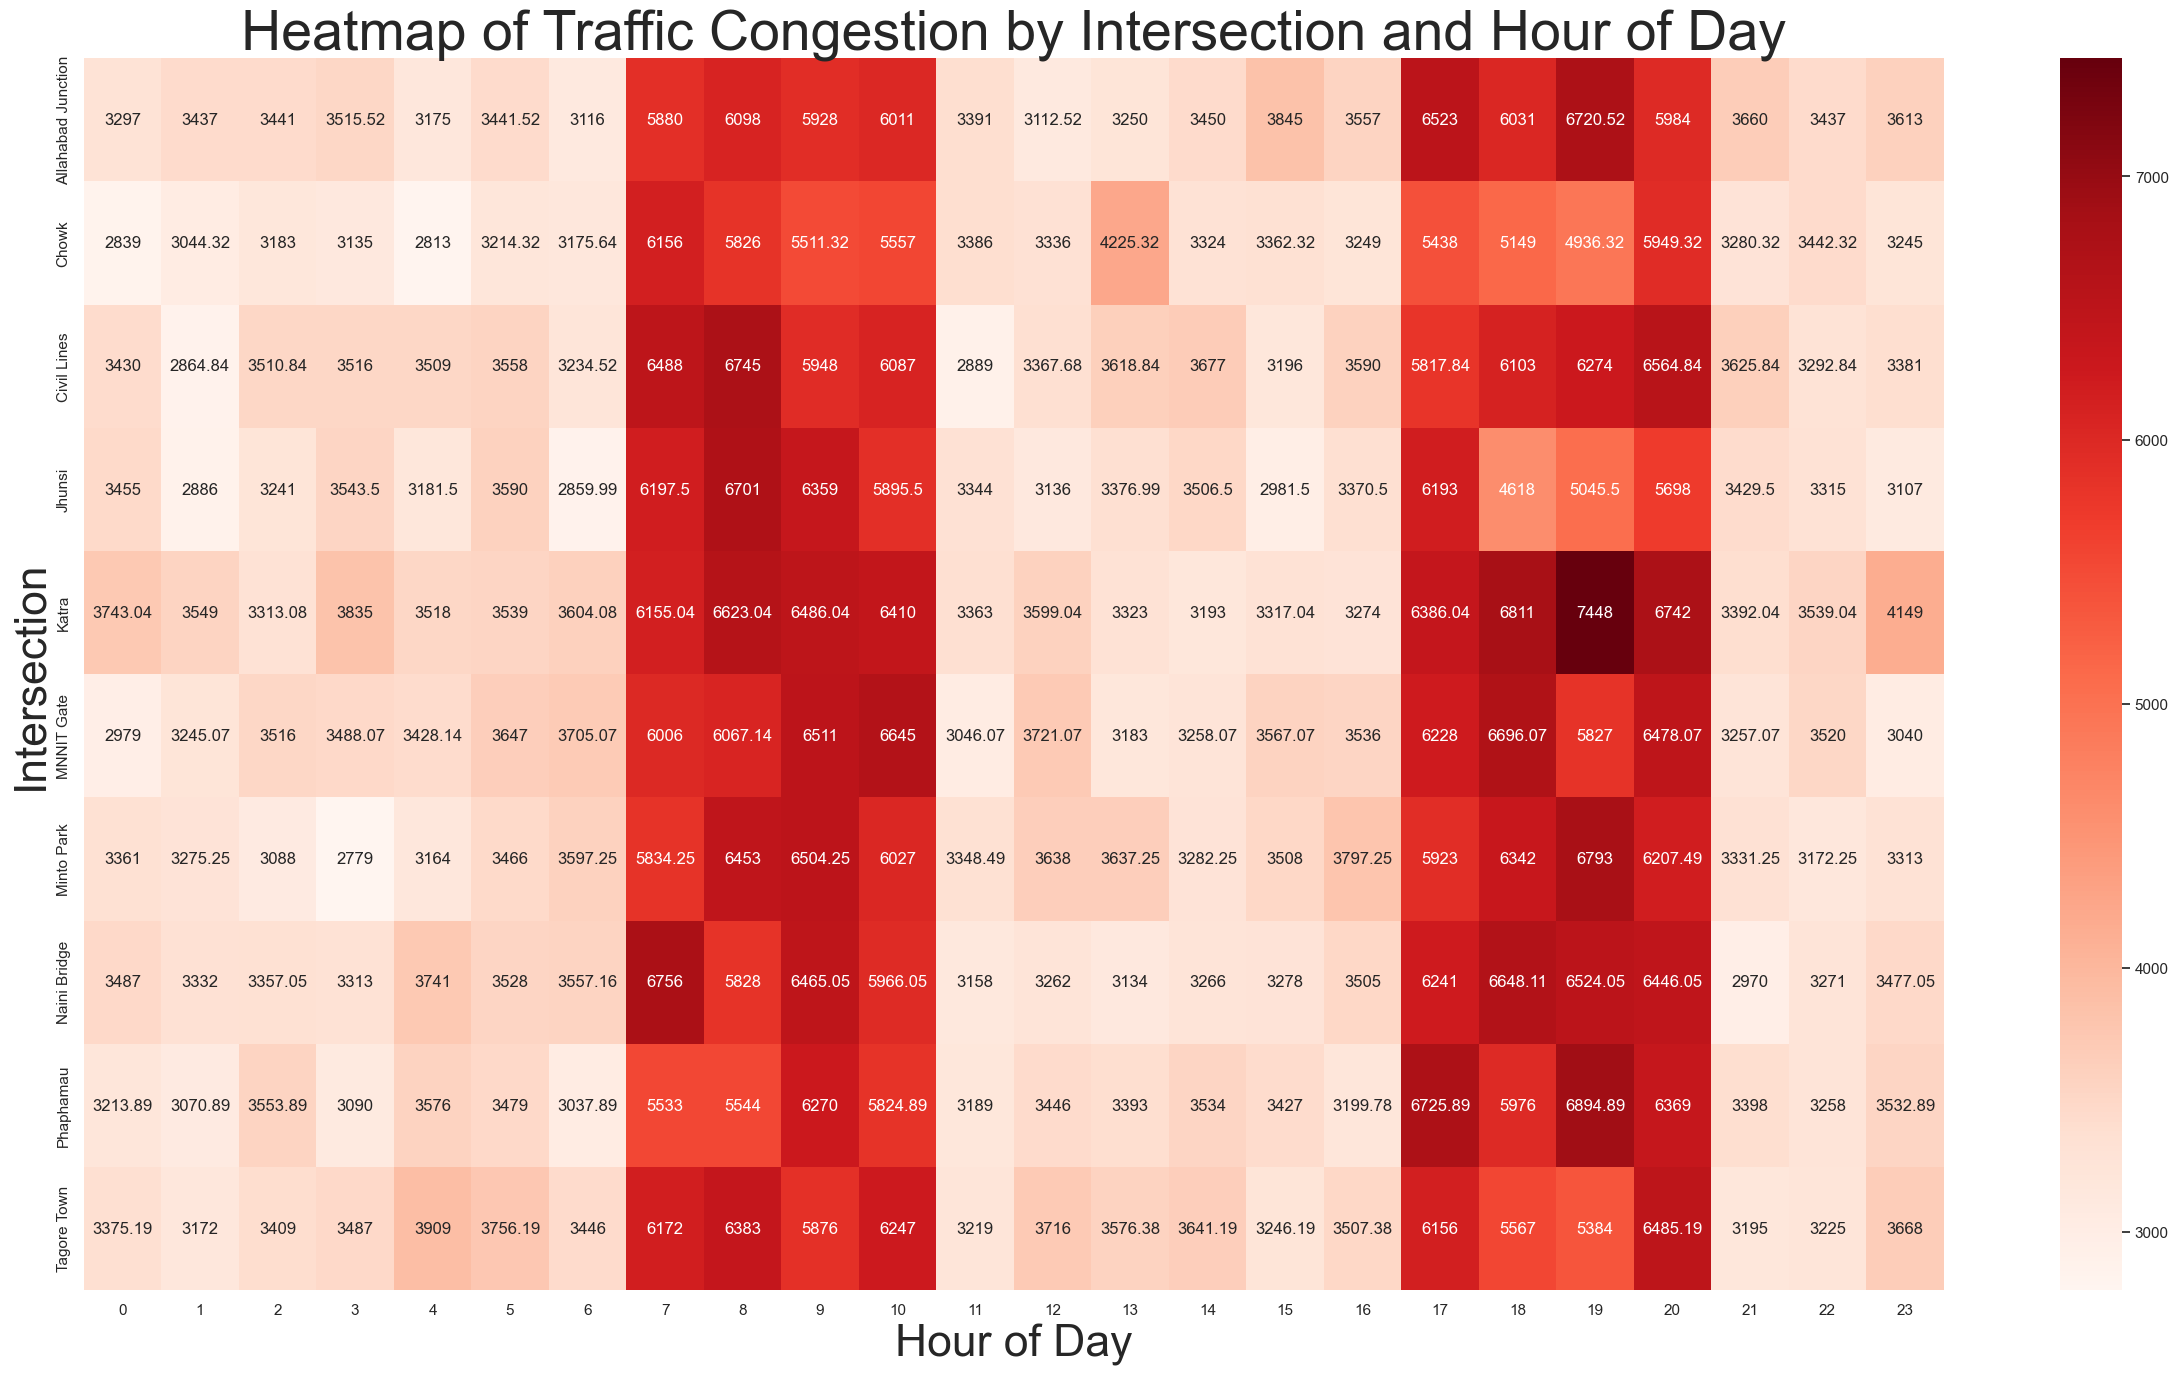

In [37]:
plt.figure(figsize=(30, 16))  # Adjust figure size as needed
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt="g")

plt.title('Heatmap of Traffic Congestion by Intersection and Hour of Day', fontsize=40)
plt.xlabel('Hour of Day', fontsize=32)
plt.ylabel('Intersection', fontsize=32)

# Display the heatmap
plt.show()

# Saving the File

In [14]:
plt.show()
data.to_csv("Updated_data.csv",index = False )
cat_data.to_csv("Updated_data_without_categorical_encoding.csv",index = False )